## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

## Pernyataan Masalah

    *Bagaimana cara dalam meningkatkan trend penjualan e-commerce di pakistan ?

## Import Dataset

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Documents\Contoh Dataset\Dataset.csv')
df.head(5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_36276\853762210.py:1: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\ASUS\Documents\Contoh Dataset\Dataset.csv')


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


Dataset ini berisi informasi transaksi penjualan ecommerce di Pakistan dari Maret 2016 sampai dengan Agustus 2018. 
Dalam datset transaksi penjualan ini terdapat 26 kolom yaitu :
1. item_id = id unik setiap produk yang dipesan
2. status = update status pemesanan
3. create_at = tanggal dilakukan pemesanan 
4. sku = nama produk 
5. price = harga satuan produk
6. qty_order = jumlah pemesanan produk
7. grand_total = total harga pemesanan produk
8. increment_id = id pembayaran
9. category_name_1 = kategori nama produk
10. sales_commision_code = kode komisi penjualan
11. discount_amount = diskon / potongan harga
12. payment_method = metode pembayaran pemesanan
13. Working Date = tanggal proses pemesanan
14. BI Status = status transaksi bersih / kotor
15. MV = total harga pemesanan yang harus dibayarkan
16. Year = tahun terjadinya transaksi
17. Month = bulan terjadinya transaksi
18. Customer_Since = tahun-bulan pelanggan bergabung
19. M-Y = informasi kode bulan-tahun pelanggan bergabung
20. FY = tahun fiskal anggaran keuangan ecommerce
21. Customer ID = id pelanggan
22. Unnamed 21 : kolom kosong
23. Unnamed 22 : kolom kosong
24. Unnamed 23 : kolom kosong
25. Unnamed 24 : kolom kosong
26. Unnamed 25 : kolom kosong

## Data Understanding & Cleaning

In [3]:
print(f'Jumlah baris dan kolom pada dataset adalah {df.shape}')
display(df.info())

Jumlah baris dan kolom pada dataset adalah (1048575, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 

None

##### 1. Menghapus Kolom & Baris

In [4]:
df = df.drop(columns=['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1)

df = df.drop(index=range(584524,1048575),axis=1)

df = df.drop(columns=['Customer Since'],axis=1)

df = df.drop(columns=['M-Y'],axis=1)

df = df.drop(columns=['sales_commission_code'],axis=1)

df = df.drop(columns=['FY'],axis=1)

df = df.drop(columns=['BI Status'],axis=1)


* Hapus Kolom `Unnamed: 21` sampai dengan `Unnamed: 25`. Karena merupakan kolom yg sepenuhnya kosong dan tidak ada kaitannya dengan kolom lain serta data kosong tersebar tidak secara acak (MNAR)

* Hapus Baris 584524 sampai dengan 1048574. Karena baris tersebut sepenuhnya kosong di setiap kolomnya dan data kosong tersebar tidak secara acak (MNAR)

* Hapus Kolom `Customer Since`, `M-Y`. Karena analisa hanya membutuhkan profil Customer ID pelanggan bukan kapan pelanggan bergabung.

* Hapus Kolom `sales_comission_code`. Karena analisa tidak berkaitan dengan komisi dari hasi penjualan yang didapatkan.

* Hapus Kolom `FY`. Karena analisa tidak berkaitan dengan laporan anggaran keuangan tahunan ecommerce.

* Hapus kolom `BI Status`. Karena analisa tidak berkaitan dengan pendapatan Net, Valid, dan Gross.

##### 2. Rename Kolom

In [5]:
df = df.rename(columns={' MV ' : 'mv','Working Date' : 'working_date','Year':'year','Month':'month','category_name_1':'category_name','Customer ID' : 'customer_id'})

* Alasan mengganti nama kolom ` MV ` karena kolom sebelumnya terdapat spasi dalam nama kolom
* Alasan mengganti nama kolom `Working Date`, `BI Status`, `Year`, `Month`, `Customer ID` karena agar semua nama kolom menggunakan lowercase dan spasinya menggunakan _
* Alasan mengganti nama kolom `category_name_1` karena tidak ingin ada angka pada nama kolom

##### 3. Mengganti Tipe Data Pada Kolom

In [6]:
df['item_id'] = df['item_id'].astype('Int64')
df['customer_id'] = df['customer_id'].astype('Int64')
df['year'] = df['year'].astype('Int64')
df['month'] = df['month'].astype('Int64')


df['created_at'] = pd.to_datetime(df['created_at'])
df['working_date'] = pd.to_datetime(df['working_date'])



* Kolom `item_id` & `customer_id` dari tipe data object menjadi int karena id merupakan unik dan umumnya tidak memiliki angka di belakang koma serta untuk mempermudah proses identifikasi
* Kolom `year` dan `month` dari tipe data object menjadi int karena dalam tahun dan bulan tidak ada angka di belakang koma

* Kolom `created_at` dan `working_date` dari tipe data object menjadi datetime karena kolom tersebut merujuk pada kapan terjadinya suatu kejadian / (waktu)

In [7]:
display(df.info(),df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          584524 non-null  Int64         
 1   status           584509 non-null  object        
 2   created_at       584524 non-null  datetime64[ns]
 3   sku              584504 non-null  object        
 4   price            584524 non-null  float64       
 5   qty_ordered      584524 non-null  float64       
 6   grand_total      584524 non-null  float64       
 7   increment_id     584524 non-null  object        
 8   category_name    584360 non-null  object        
 9   discount_amount  584524 non-null  float64       
 10  payment_method   584524 non-null  object        
 11  working_date     584524 non-null  datetime64[ns]
 12  mv               584524 non-null  object        
 13  year             584524 non-null  Int64         
 14  month            584

None

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name,discount_amount,payment_method,working_date,mv,year,month,customer_id
0,211131,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,2016-07-01,"1,950",2016,7,1
1,211133,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,0.0,cod,2016-07-01,240,2016,7,2
2,211134,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,0.0,cod,2016-07-01,"2,450",2016,7,3
3,211135,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,2016-07-01,360,2016,7,4
4,211136,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,0.0,cod,2016-07-01,"1,110",2016,7,5


##### 4. Missing Value Setiap Kolom

In [8]:
# 1. Kolom status
# display(df['status'].nunique(),df['status'].isnull().sum())
df.loc[df['item_id'] == 872154,'status'] = 'canceled'
df['status'] = df['status'].fillna('complete')

# 2. Kolom sku 
# display(df['sku'].nunique(),df['sku'].isnull().sum())
df.loc[df['item_id'] == 605726,'sku'] = 'ENTECO5A7FE80D6C830'
df.loc[df['item_id'] == 605740,'sku'] = 'ENTECO5A7FE80D6C830'
df.loc[df['item_id'] == 605954,'sku'] = 'ENTECO5A7FE80D6C830'
df['sku'] = df['sku'].fillna('emart_00-1')

# 3. Kolom category_name
# display(df['category_name'].nunique(),df['category_name'].isnull().sum())
df.loc[df['sku'].str.startswith('MEF') & df['category_name'].isna(), 'category_name'] = 'Men\'s Fashion'
df.loc[df['sku'].str.startswith('OTH') & df['category_name'].isna(), 'category_name'] = 'Others'
df.loc[df['sku'].str.startswith('COM') & df['category_name'].isna(), 'category_name'] = 'Computing'
df.loc[df['sku'].str.startswith('WOF') & df['category_name'].isna(), 'category_name'] = 'Women\'s Fashion'
df.loc[df['sku'].str.startswith('MAT') & df['category_name'].isna(), 'category_name'] = 'Mobiles & Tablets'
df.loc[df['sku'].str.startswith('BAG') & df['category_name'].isna(), 'category_name'] = 'Beauty & Grooming'
df.loc[df['sku'].str.startswith('KAB') & df['category_name'].isna(), 'category_name'] = 'Kids & Baby'

# 4. Kolom customer_id
# display(df['customer_id'].nunique(),df['customer_id'].isnull().sum()) #115326 11
mode_customer_id = df['customer_id'].mode() #85775
df['customer_id'] = df['customer_id'].fillna(85775)

* Kolom `status`
    - Terdapat 16 values / nunique pada kolom `status`.
    - Terdapat 15 missing values pada kolom `status`.
    - 1 data missing values yang `payment_method` = 'bankalfalah' akan saya isi 'canceled', karena value 'canceled' merupakan value yang terbanyak (mode) pada `payment_method` = 'bankalfalah'.
    - 14 data missing values yang `payment_method` = 'cod' akan saya isi 'complete', karena value 'complete' merupakan value yang terbanyak (mode) pada `payment_method` = 'cod'.
* Kolom `sku`
    - Terdapat 84889 values / nunique pada kolom `sku`.
    - Terdapat 20 missing values pada kolom `sku`.
    - `sku` merupakan nama produk yang berkaitan dengan `category_name` yang merupakan kategori nama produk.
    - 17 data missing values yang `category_name` = '\\N' akan saya isi 'emart_00-1', karena 'emart_00-1' merupakan value terbanyak (mode) pada `category_name` = '\\N'.
    - 3 data missing values yang `category_name` = 'Entertainment' akan saya isi 'ENTECO5A7FE80D6C830', karena 'ENTECO5A7FE80D6C830' merupakan value terbanyak (mode) pada `category_name` = 'Entertainment'.
* Kolom `category_name`
    - Terdapat 16 values / nunique pada kolom `category_name`
    - Terdapat 164 missing values pada kolom `category_name`
    - `category_name` merupakan kategori nama produk yang berkaitan dengan `sku` yang merupakan nama produk.
    - Jika mising values yang kolom `sku` nya berawal huruf MEF maka mising values pada `category_name` akan saya isi 'Men's Fashion'
    - Jika mising values yang kolom `sku` nya berawal huruf OTH maka mising values pada `category_name` akan saya isi 'Others'
    - Jika mising values yang kolom `sku` nya berawal huruf COM maka mising values pada `category_name` akan saya isi 'Computing'
    - Jika mising values yang kolom `sku` nya berawal huruf WOF maka mising values pada `category_name` akan saya isi 'Women's Fashion'
    - Jika mising values yang kolom `sku` nya berawal huruf MAT maka mising values pada `category_name` akan saya isi 'Mobiles & Tablets'
    - Jika mising values yang kolom `sku` nya berawal huruf BAG maka mising values pada `category_name` akan saya isi 'Beauty & Grooming'
    - Jika mising values yang kolom `sku` nya berawal huruf KAB maka mising values pada `category_name` akan saya isi 'Kids & Baby'
* Kolom `customer_id`
    - Terdapat 115326 values / nunique pada kolom `customer_id`
    - Terdapat 11 missing values pada kolom `customer_id`
    - 11 missing values akan saya isi dengan id terbanyak (mode) pada kolom `customer_id`

In [9]:
print(f'Jumlah baris dan kolom',df.shape[0])
display(df.info(),df.head(5))

Jumlah baris dan kolom 584524
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          584524 non-null  Int64         
 1   status           584524 non-null  object        
 2   created_at       584524 non-null  datetime64[ns]
 3   sku              584524 non-null  object        
 4   price            584524 non-null  float64       
 5   qty_ordered      584524 non-null  float64       
 6   grand_total      584524 non-null  float64       
 7   increment_id     584524 non-null  object        
 8   category_name    584524 non-null  object        
 9   discount_amount  584524 non-null  float64       
 10  payment_method   584524 non-null  object        
 11  working_date     584524 non-null  datetime64[ns]
 12  mv               584524 non-null  object        
 13  year             584524 non-null  Int64     

None

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name,discount_amount,payment_method,working_date,mv,year,month,customer_id
0,211131,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,2016-07-01,"1,950",2016,7,1
1,211133,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,0.0,cod,2016-07-01,240,2016,7,2
2,211134,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,0.0,cod,2016-07-01,"2,450",2016,7,3
3,211135,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,2016-07-01,360,2016,7,4
4,211136,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,0.0,cod,2016-07-01,"1,110",2016,7,5


##### 5. Cek Duplikat

In [10]:
df.duplicated().sum()

0

##### 6. Statistik Deskriptif

In [11]:
display(df.describe(include=object),df.describe())

,status,sku,increment_id,category_name,payment_method,mv
count,584524,584524,584524,584524,584524,584524
unique,16,84889,408785,16,18,9720
top,complete,MATSAM59DB75ADB2F80,100266667,Mobiles & Tablets,cod,999
freq,233699,3775,72,115711,271960,9516


,item_id,price,qty_ordered,grand_total,discount_amount,year,month,customer_id
count,584524.0,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.0,584524.0,584524.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45791.264422
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34415.075674
min,211131.0,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.0,1.0,1.0
25%,395000.75,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.0,4.0,13516.0
50%,568424.5,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.0,7.0,42856.0
75%,739106.25,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.0,11.0,73538.0
max,905208.0,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.0,12.0,115326.0


## Data Analisis & Visualisasi

Setelah melakukan proses Data Cleaning, saya akan melanjutkan proses data analisis & visualisasi. Pada tahap Data Analisis & Visualisasi ini akan membantu menjawab beberapa pertanyaan yang berkaitan dengan data transaksi ecommerce pakistan dari maret 2016 sampai agustus 2018.



    * Berapa rata-rata transaksi setiap bulannya dari Maret 2016 sampai Agustus 2018 ?
    * Pada bulan apa biasanya terjadi peningkatan transaksi ?
    * Pada bulan apa biasanya terdapat banyak diskon ?
    

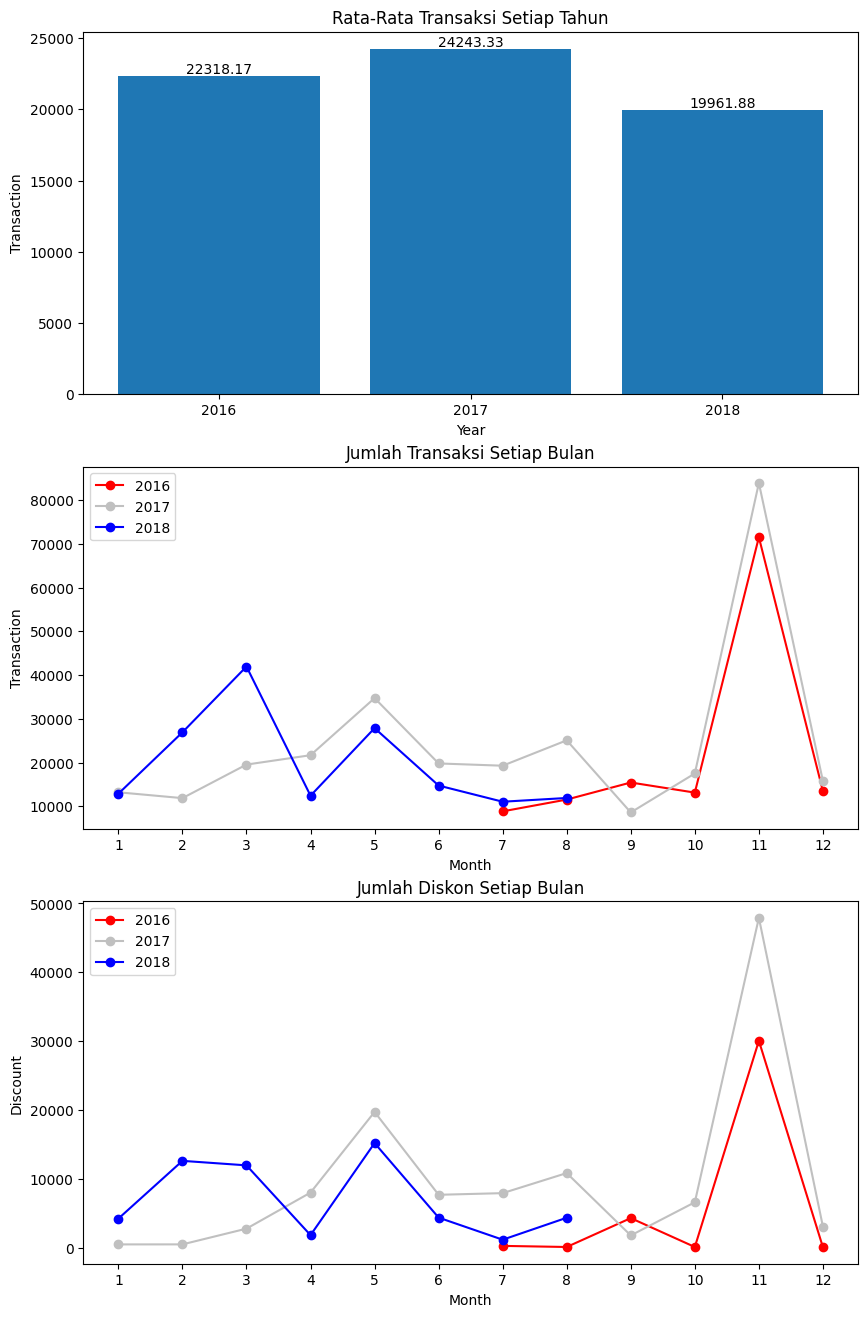

In [12]:
# Rata2 Transaksi Setiap Tahun Sesuai Dengan Jumlah Bulannya
avg_year = df.groupby(['year'])['item_id'].count().reset_index()
y2 = df.groupby(['year'])['month'].nunique().reset_index()
avg_year['avg_by_month'] = avg_year['item_id'] / y2['month']
x1 = avg_year['year']
y1 = avg_year['avg_by_month']

# Jumlah Transaksi Setiap Bulan
transaction_by_month = df.groupby(['year','month'])['item_id'].count().reset_index()
x_2016 = transaction_by_month['month'][transaction_by_month['year']==2016]
y_2016 = transaction_by_month['item_id'][transaction_by_month['year']==2016]
x_2017 = transaction_by_month['month'][transaction_by_month['year']==2017]
y_2017 = transaction_by_month['item_id'][transaction_by_month['year']==2017]
x_2018 = transaction_by_month['month'][transaction_by_month['year']==2018]
y_2018 = transaction_by_month['item_id'][transaction_by_month['year']==2018]

# Jumlah Diskon Setiap Bulan
discount_by_mounth = df.loc[df['discount_amount'] != 0]
discount_by_mounth = discount_by_mounth.groupby(['year','month'])['discount_amount'].count().reset_index()
discountx_2016 = discount_by_mounth['month'][discount_by_mounth['year']==2016]
discounty_2016 = discount_by_mounth['discount_amount'][discount_by_mounth['year']==2016]
discountx_2017 = discount_by_mounth['month'][discount_by_mounth['year']==2017]
discounty_2017 = discount_by_mounth['discount_amount'][discount_by_mounth['year']==2017]
discountx_2018 = discount_by_mounth['month'][discount_by_mounth['year']==2018]
discounty_2018 = discount_by_mounth['discount_amount'][discount_by_mounth['year']==2018]


# Matplotlib
fig,ax = plt.subplots(3,figsize=(10, 16))
xticks = np.arange(2016,2019)

bar = ax[0].bar(x1,height=y1)
bar = ax[0].bar_label(bar, fmt='{:.2f}')
bar = ax[0].set(xlabel='Year',ylabel='Transaction',title='Rata-Rata Transaksi Setiap Tahun')
bar = ax[0].set_xticks(xticks)

lines = ax[1].plot(x_2016,y_2016,marker='o',color='red',label='2016')
lines = ax[1].plot(x_2017,y_2017,marker='o',color='silver',label='2017')
lines = ax[1].plot(x_2018,y_2018,marker='o',color='blue',label='2018')
lines = plt.sca(ax[1])
lines = plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
lines = ax[1].set_title('Jumlah Transaksi Setiap Bulan')
lines = ax[1].set_xlabel('Month')
lines = ax[1].set_ylabel('Transaction')
lines = ax[1].legend(loc='upper left')

lines2 = ax[2].plot(discountx_2016,discounty_2016,marker='o',color='red',label='2016')
lines2 = ax[2].plot(discountx_2017,discounty_2017,marker='o',color='silver',label='2017')
lines2 = ax[2].plot(discountx_2018,discounty_2018,marker='o',color='blue',label='2018')
lines2 = plt.sca(ax[2])
lines2 = plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
lines2 = ax[2].set_title('Jumlah Diskon Setiap Bulan')
lines2 = ax[2].set_xlabel('Month')
lines2 = ax[2].set_ylabel('Discount')
lines2 = ax[2].legend(loc='upper left')




plt.show()


Berdasarkan grafik diatas saya mendapatkan insight yaitu :

* Rata-rata transaksi perbulan tertinggi terjadi pada tahun 2017.
* Transaksi tertinggi terjadi pada bulan ke 11 yaitu bulan november setiap tahunnya.
* Total diskon terbanyak terjadi pada bulan november setiap tahunnya


    * Kategori produk apa yang paling banyak diminati di ecommerce pakistan ?
    * Kategori produk apa yang memiliki diskon terbanyak ?
    * Payment method apa yang paling banyak digunakan di ecommerce pakistan  ?

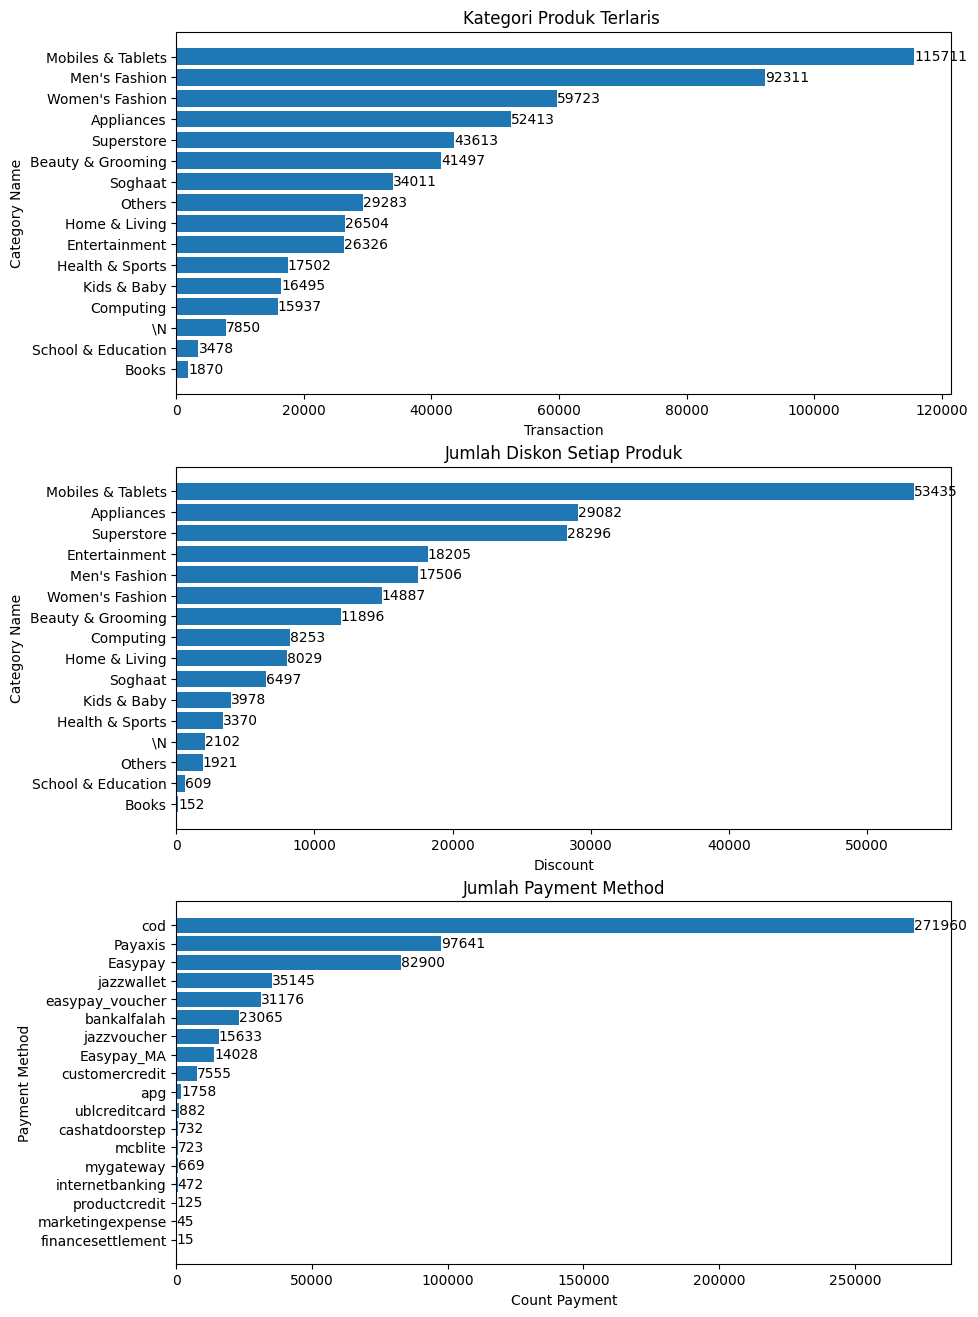

In [13]:
# Produk Terlaris
produk = df.groupby(['category_name'])['item_id'].count()
produk = produk.sort_values(ascending=True)

# Total Diskon Per Produk
produk_discount = df.loc[df['discount_amount'] != 0]
produk_discount = produk_discount.groupby('category_name')['item_id'].count()
produk_discount = produk_discount.sort_values(ascending=True)

# Total Payment Method
payment = df.groupby('payment_method')['item_id'].count()
payment = payment.sort_values(ascending=True)

# Matplotlib
fig,ax = plt.subplots(3,figsize=(10, 16))
xticks = np.arange(2016,2019)

top_produk = ax[0].barh(produk.index,produk.values)
top_produk = ax[0].bar_label(top_produk, fmt='{:.0f}')
top_produk = ax[0].set(title='Kategori Produk Terlaris ')
top_produk = ax[0].set_xlabel('Transaction')
top_produk = ax[0].set_ylabel('Category Name')

top_discount = ax[1].barh(produk_discount.index,produk_discount.values)
top_discount = ax[1].bar_label(top_discount, fmt='{:.0f}')
top_discount = ax[1].set(title='Jumlah Diskon Setiap Produk')
top_discount = ax[1].set_xlabel('Discount')
top_discount = ax[1].set_ylabel('Category Name')

top_payment = ax[2].barh(payment.index,payment.values)
top_payment = ax[2].bar_label(top_payment, fmt='{:.0f}')
top_payment = ax[2].set(title='Jumlah Payment Method')
top_payment = ax[2].set_xlabel('Count Payment')
top_payment = ax[2].set_ylabel('Payment Method')



Berdasarkan grafik diatas saya mendapatkan insight yaitu :

* Mobiles & Tablets merupakan kategori produk yang paling banyak diminati di ecommerce pakistan.
* Diskon terbanyak terdapat pada kategori produk Mobiles & Tablets.
* Payment Method yang paling sering digunakan warga pakistan dalam berbelanja ecommerce adalah cod atau cash on delivery.

    * Berapa jumlah pelanggan yang pernah mendapatkan diskon dan tidak pernah mendapatkan diskon ?
    * Berapa rata-rata transaksi pelanggan yang mendapatkan diskon dan tidak mendapatkan diskon ?

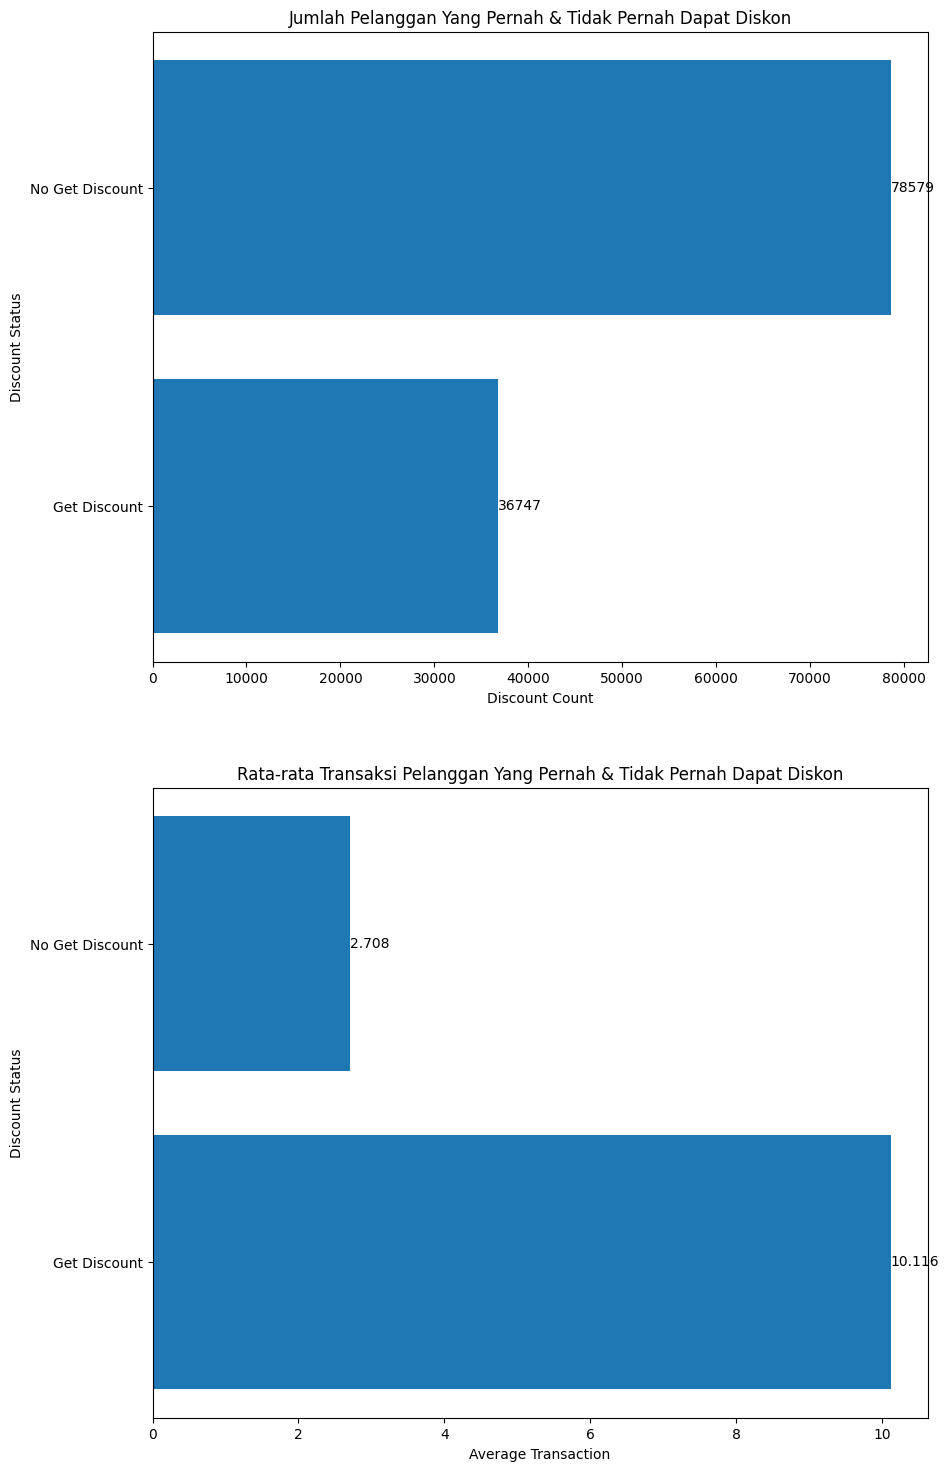

In [14]:
# Produk Terlaris
produk = df.groupby(['category_name'])['item_id'].count()
produk = produk.sort_values(ascending=True)

# Total Diskon Per Produk
produk_discount = df.loc[df['discount_amount'] != 0]
produk_discount = produk_discount.groupby('category_name')['item_id'].count()
produk_discount = produk_discount.sort_values(ascending=True)

# Total Payment Method
payment = df.groupby('payment_method')['item_id'].count()
payment = payment.sort_values(ascending=True)

# Pelanggan Yang Pernah Dapat Diskon dan Tidak Pernah Dapat Diskon 
customer = df.groupby('customer_id')['item_id'].count().reset_index()
discount = df.groupby('customer_id')['discount_amount'].sum().reset_index()
customer_discount = pd.concat([customer,discount['discount_amount']],axis=1)
def discount_status(x):
    if x != 0:
        return 'Get Discount'
    else:
        return 'No Get Discount'
customer_discount.insert(3,'discount_status',customer_discount['discount_amount'].apply(discount_status))
customer_discount0 = customer_discount.groupby('discount_status')['customer_id'].count()

# Rata-rata Transaksi Pelanggan Yang Dapat Diskon & Tidak Dapat Diskon
customer_discount1 = customer_discount.groupby('discount_status')['item_id'].mean()

# Matplotlib
fig,ax = plt.subplots(2,figsize=(10, 18))
xticks = np.arange(2016,2019)

customer_discount_status = ax[0].barh(customer_discount0.index,customer_discount0.values)
customer_discount_status = ax[0].bar_label(customer_discount_status, fmt='{:.0f}')
customer_discount_status = ax[0].set(title='Jumlah Pelanggan Yang Pernah & Tidak Pernah Dapat Diskon')
customer_discount_status = ax[0].set_xlabel('Discount Count')
customer_discount_status = ax[0].set_ylabel('Discount Status')

customer_discount_status1 = ax[1].barh(customer_discount1.index,customer_discount1.values)
customer_discount_status1 = ax[1].bar_label(customer_discount_status1, fmt='{:.3f}')
customer_discount_status1 = ax[1].set(title='Rata-rata Transaksi Pelanggan Yang Pernah & Tidak Pernah Dapat Diskon')
customer_discount_status1 = ax[1].set_xlabel('Average Transaction')
customer_discount_status1 = ax[1].set_ylabel('Discount Status')


Berdasarkan grafik diatas saya mendapatkan insight yaitu :

* Dari total 115.326 pelanggan, terdapat 78.579 tidak pernah dapat diskon, sisanya 36.747 pelanggan pernah mendapat diskon.
* Rata-rata transaksi pelanggan yang tidak pernah dapat diskon adalah 2,708 sedangkan rata-rata transaksi pelanggan yang pernah dapat diskon adalah 10,116.

**Kesimpulan**
    
* Rata-rata Transaksi E-Commerce pakistan perbulannya cenderung fluktuatif, hal itu bisa dilihat dari rata-rata transaksi perbulan tahun 2016 sebanyak 22.318 transaksi, kemudian mengalami kenaikan menjadi 24.243 pada tahun 2017 dan kembali mengalami penurunan menjadi 19.961 pada tahun 2018.
* Tingkat kenaikan transaksi E-Commerce Pakistan sangat dipengaruhi oleh adanya diskon. Jika terdapat banyak diskon maka akan semakin banyak terjadi transaksi. Hal itu bisa dilihat setiap bulan November terjadi kenaikan transaksi karena terdapat banyak diskon pada bulan November.
* Tingginya minat pada suatu kategori produk di E-Commerce Pakistan juga sangat dipengaruhi oleh adanya Diskon. Jika suatu kategori produk terdapat banyak diskon, maka akan semakin banyak diminati dan laris.
* Payment method yang paling sering digunakan di E-Commerce Pakistan dari maret 2016 sampai agustus 2018 adalah Cod atau Cash On Delivery.
* Pemberian diskon bukan bergantung seberapa banyak pelanggan melakukan transaksi melainkan diskon hanya diberikan berdasarkan kategori produk dan waktu tertentu. Hal itu bisa dilihat pada grafik, ada beberapa pelanggan yang sudah melakukan transaksi lebih dari 2 kali bahkan lebih namun tidak mendapatkan diskon.


**Rekomendasi**
* Memberikan banyak diskon setiap bulannya untuk meningkatkan jumlah transaksi setiap bulannya.
* Mendorong warga Pakistan untuk menggunakan metode pembayaran non-tunai atau selain cod. Dan salah satu cara yang dapat digunakan adalah dengan memberikan diskon atau gratis ongkir dengan menggunakan metode pembayaran selain cod.
* Pemberian diskon bukan hanya berdasarkan kategori produk tapi juga berdasarkan minimal transaksi yang dilakukan pelanggan agar bisa meningkatkan daya tarik pelanggan, loyalitas pelanggan & jumlah transaksi pada E-Commerce.
